In [16]:
!pip install filterpy

     ---------------------------------------- 0.0/178.0 kB ? eta -:--:--
     ------ ------------------------------ 30.7/178.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------  174.1/178.0 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 178.0/178.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110630 sha256=848071a448f1b4024e96f7562d98f023e04af687da464e657de17eb627d6e274
  Stored in directory: c:\users\wine\appdata\local\pip\cache\wheels\77\bf\4c\b0c3f4798a0166668752312a67118b27a3cd341e13ac0ae6ee
Successfully built filterpy



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install roboflow


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install ultralytics


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!git clone https://github.com/abewley/sort.git

Cloning into 'sort'...


In [4]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110460 sha256=b39c80d325fefac4b5947d259c927e10c223b5be1911abada4c27f692e9a5ea7
  Stored in directory: /root/.cache/pip/wheels/12/dc/3c/e12983eac132d00f82a20c6cbe7b42ce6e96190ef8fa2d15e1
Successfully built filterpy


In [4]:
!pip install easyocr

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.9 MB 5.9 MB/s eta 0:00:01
   ------- -------------------------------- 0.6/2.9 MB 7.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.9/2.9 MB 7.1 MB/s eta 0:00:01
   ------------------- -------------------- 1.4/2.9 MB 8.0 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.9 MB 7.2 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.9 MB 7.8 MB/s eta 0:00:01
   ------------------------------------ --- 2.6/2.9 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   ---------------------------------------- 296.5/296.5 kB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/110.3 kB ? eta -:--:--
   ---------------------------------------- 110.3/110.3 kB ? eta 0:00:00
   -------------------------


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Download data

In [5]:
from google.colab import files

uploaded = files.upload()

Saving sample.mp4 to sample.mp4


In [ ]:
from roboflow import Roboflow


rf = Roboflow(api_key="YOUR_API_KEY")

project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
dataset = project.version(4).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov8:: 100%|██████████| 48488/48488 [00:14<00:00, 3403.44it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
import os

dataset_path = './License-Plate-Recognition-4'
os.listdir(dataset_path)

['data.yaml',
 'README.dataset.txt',
 'README.roboflow.txt',
 'test',
 'train',
 'valid']

In [6]:
train_folder = os.path.join(dataset_path, 'train/images')
val_folder = os.path.join(dataset_path, 'valid/images')
test_folder = os.path.join(dataset_path, 'test/images')

num_train = len(os.listdir(train_folder))
num_val = len(os.listdir(val_folder))
num_test = len(os.listdir(test_folder))

print(f"Train dataset size: {num_train} images")
print(f"Validation dataset size: {num_val} images")
print(f"Test dataset size: {num_test} images")

Train dataset size: 21173 images
Validation dataset size: 2046 images
Test dataset size: 1019 images


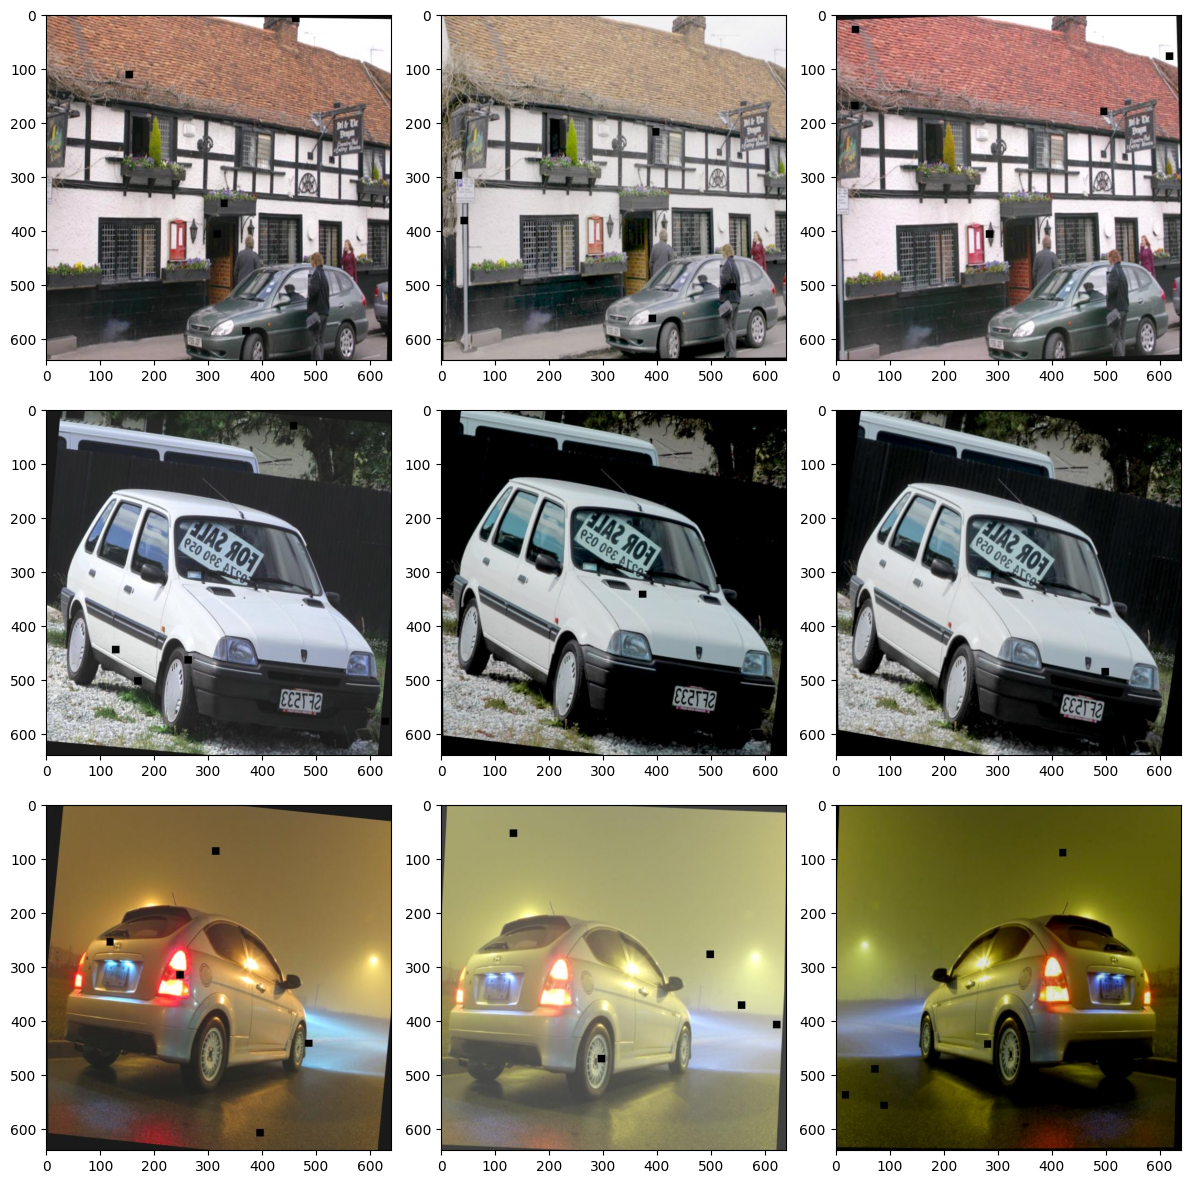

In [7]:
import cv2
import matplotlib.pyplot as plt

train_files = [f for f in os.listdir(train_folder)]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()
for i in range(9):
  img_path = os.path.join(train_folder, train_files[i])
  img = cv2.imread(img_path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  axes[i].imshow(img_rgb)
plt.tight_layout()
plt.show()

# Model

In [8]:
import ultralytics
from ultralytics import YOLO

print(ultralytics.__version__)

8.3.122


In [11]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 97.1MB/s]


In [10]:
model = YOLO('./best.pt')

In [ ]:
train_results = model.train(
    data="./config.yaml",
    epochs=20,
    imgsz=640,
    device='cpu'
)

Ultralytics 8.3.122  Python-3.12.4 torch-2.7.0+cpu CPU (AMD Ryzen 9 7950X 16-Core Processor)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=Non

100%|██████████| 755k/755k [00:00<00:00, 8.61MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access  (ping: 0.10.1 ms, read: 123.6135.9 MB/s, size: 43.7 KB)


train: Scanning C:\Users\wine\Giang\Code\Viet\Cell-free-new\License_Plate\License-Plate-Recognition-4\train\labels... 21173 images, 28 backgrounds, 0 corrupt: 100%|██████████| 21173/21173 [00:14<00:00, 1486.87it/s]


train: New cache created: C:\Users\wine\Giang\Code\Viet\Cell-free-new\License_Plate\License-Plate-Recognition-4\train\labels.cache
val: Fast image access  (ping: 0.00.0 ms, read: 303.4112.4 MB/s, size: 35.9 KB)


'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
val: Scanning C:\Users\wine\Giang\Code\Viet\Cell-free-new\License_Plate\License-Plate-Recognition-4\valid\labels... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:01<00:00, 1363.30it/s]

val: New cache created: C:\Users\wine\Giang\Code\Viet\Cell-free-new\License_Plate\License-Plate-Recognition-4\valid\labels.cache



'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.279      1.247      1.252          9        640: 100%|██████████| 1324/1324 [1:39:13<00:00,  4.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:38<00:00,  3.41s/it]


                   all       2046       2132      0.951      0.878      0.941      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.278     0.7951      1.264          8        640: 100%|██████████| 1324/1324 [1:17:48<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [01:42<00:00,  1.60s/it]

                   all       2046       2132      0.938      0.899      0.943       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/20         0G      1.262     0.7516      1.259         13        640: 100%|██████████| 1324/1324 [42:15<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [01:42<00:00,  1.60s/it]

                   all       2046       2132      0.935      0.903      0.939      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/20         0G      1.225     0.7018      1.247          9        640: 100%|██████████| 1324/1324 [43:14<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [01:44<00:00,  1.63s/it]

                   all       2046       2132      0.952      0.923      0.959      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/20         0G      1.202     0.6624      1.229         13        640: 100%|██████████| 1324/1324 [43:45<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [01:50<00:00,  1.72s/it]

                   all       2046       2132       0.97      0.929      0.963       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/20         0G       1.17     0.6333      1.206          7        640: 100%|██████████| 1324/1324 [44:09<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [01:49<00:00,  1.71s/it]

                   all       2046       2132      0.968      0.936      0.969      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.159     0.6146      1.203          9        640: 100%|██████████| 1324/1324 [39:22<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [01:28<00:00,  1.39s/it]

                   all       2046       2132      0.951      0.936      0.967      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/20         0G      1.145     0.5908      1.187         11        640: 100%|██████████| 1324/1324 [40:01<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:30<00:00,  3.28s/it]

                   all       2046       2132      0.971       0.94      0.972      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.131     0.5765      1.184         10        640: 100%|██████████| 1324/1324 [1:29:52<00:00,  4.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:44<00:00,  3.51s/it]

                   all       2046       2132      0.976      0.946      0.974      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.112     0.5602      1.178         14        640: 100%|██████████| 1324/1324 [1:41:33<00:00,  4.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:50<00:00,  3.60s/it]

                   all       2046       2132      0.972      0.949      0.973      0.667


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
      11/20         0G      1.094     0.4784      1.202          5        640: 100%|██████████| 1324/1324 [1:33:31<00:00,  4.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:16<00:00,  3.07s/it]

                   all       2046       2132      0.974      0.946      0.977      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.074     0.4619      1.193          6        640: 100%|██████████| 1324/1324 [1:31:09<00:00,  4.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:08<00:00,  2.95s/it]

                   all       2046       2132      0.975      0.945      0.974      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.057     0.4447      1.186          5        640: 100%|██████████| 1324/1324 [1:33:47<00:00,  4.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:21<00:00,  3.14s/it]

                   all       2046       2132      0.981       0.94      0.976      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.043     0.4325      1.178          5        640: 100%|██████████| 1324/1324 [1:38:00<00:00,  4.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:30<00:00,  3.29s/it]

                   all       2046       2132      0.974      0.951      0.979      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.027     0.4194      1.171          5        640: 100%|██████████| 1324/1324 [1:29:18<00:00,  4.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:52<00:00,  2.69s/it]

                   all       2046       2132      0.974      0.955      0.982      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.014     0.4066      1.159          6        640: 100%|██████████| 1324/1324 [1:26:23<00:00,  3.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:50<00:00,  3.59s/it]

                   all       2046       2132      0.976      0.953      0.981      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.9995     0.3962       1.15          5        640: 100%|██████████| 1324/1324 [1:37:15<00:00,  4.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:35<00:00,  3.36s/it]

                   all       2046       2132      0.983      0.949      0.982      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.9836     0.3863       1.14          5        640: 100%|██████████| 1324/1324 [1:25:59<00:00,  3.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:42<00:00,  3.48s/it]

                   all       2046       2132      0.984      0.955      0.984      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.9727     0.3744      1.132         10        640: 100%|██████████| 1324/1324 [1:29:26<00:00,  4.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:03<00:00,  2.87s/it]

                   all       2046       2132      0.986      0.952      0.984      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.9588     0.3666      1.126          5        640: 100%|██████████| 1324/1324 [1:30:39<00:00,  4.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [03:42<00:00,  3.48s/it]

                   all       2046       2132      0.985      0.952      0.983      0.703



20 epochs completed in 26.600 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.122  Python-3.12.4 torch-2.7.0+cpu CPU (AMD Ryzen 9 7950X 16-Core Processor)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [02:34<00:00,  2.41s/it]


                   all       2046       2132      0.985      0.952      0.983      0.703
Speed: 2.0ms preprocess, 65.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train3


In [11]:
def get_car(license_plate, track_ids):
  x1, y1, x2, y2, _, _ = license_plate

  foundIt = False

  for j in range(len(track_ids)):
    xcar1, ycar1, xcar2, ycar2, car_id = track_ids[j]

    if x1 > xcar1 and x2 < xcar2 and y1 > ycar1 and y2 < ycar2:
      foundIt = True
      car_idx = j
      break

  if foundIt:
    return track_ids[car_idx]

  return -1, -1, -1, -1, -1

In [12]:
import easyocr
import string
reader = easyocr.Reader(['en'], gpu=False)

dict_char_to_int = {'O': '0',
                    'I': '1',
                    'J': '3',
                    'A': '4',
                    'G': '6',
                    'S': '5'}

dict_int_to_char = {'0': 'O',
                    '1': 'I',
                    '3': 'J',
                    '4': 'A',
                    '6': 'G',
                    '5': 'S'}

def license_complies_format(text):
  if len(text) != 7:
    return False

  if (text[0] in string.ascii_uppercase or text[0] in dict_int_to_char.keys()) and \
       (text[1] in string.ascii_uppercase or text[1] in dict_int_to_char.keys()) and \
       (text[2] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[2] in dict_char_to_int.keys()) and \
       (text[3] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[3] in dict_char_to_int.keys()) and \
       (text[4] in string.ascii_uppercase or text[4] in dict_int_to_char.keys()) and \
       (text[5] in string.ascii_uppercase or text[5] in dict_int_to_char.keys()) and \
       (text[6] in string.ascii_uppercase or text[6] in dict_int_to_char.keys()):
        return True
  else:
      return False


def format_license(text):
  formatted_text = ''
  mapping = {0:dict_int_to_char, 1: dict_int_to_char, 4: dict_int_to_char, 5:dict_int_to_char, 6:dict_int_to_char, 2:dict_char_to_int, 3:dict_char_to_int}

  for i in range(7):
    if text[i] in mapping[i].keys():
      formatted_text += mapping[i][text[i]]
    else:
      formatted_text += text[i]

  return formatted_text


def read_license_plate(license_plate_crop):
  detections = reader.readtext(license_plate_crop)


  for detection in detections:
    bbox, text, score = detection

    text = text.upper().replace(' ','')
    if license_complies_format(text):
      return format_license(text), score

    return None

Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [13]:
def write_csv(results, output_path):
    with open(output_path, 'w') as f:
        f.write('{},{},{},{},{},{},{}\n'.format('frame_nmr', 'car_id', 'car_bbox',
                                                'license_plate_bbox', 'license_plate_bbox_score', 'license_number',
                                                'license_number_score'))

        for frame_nmr in results.keys():
            for car_id in results[frame_nmr].keys():
                print(results[frame_nmr][car_id])
                if 'car' in results[frame_nmr][car_id].keys() and \
                   'license_plate' in results[frame_nmr][car_id].keys() and \
                   'text' in results[frame_nmr][car_id]['license_plate'].keys():
                    f.write('{},{},{},{},{},{},{}\n'.format(frame_nmr,
                                                            car_id,
                                                            '[{} {} {} {}]'.format(
                                                                results[frame_nmr][car_id]['car']['bbox'][0],
                                                                results[frame_nmr][car_id]['car']['bbox'][1],
                                                                results[frame_nmr][car_id]['car']['bbox'][2],
                                                                results[frame_nmr][car_id]['car']['bbox'][3]),
                                                            '[{} {} {} {}]'.format(
                                                                results[frame_nmr][car_id]['license_plate']['bbox'][0],
                                                                results[frame_nmr][car_id]['license_plate']['bbox'][1],
                                                                results[frame_nmr][car_id]['license_plate']['bbox'][2],
                                                                results[frame_nmr][car_id]['license_plate']['bbox'][3]),
                                                            results[frame_nmr][car_id]['license_plate']['bbox_score'],
                                                            results[frame_nmr][car_id]['license_plate']['text'],
                                                            results[frame_nmr][car_id]['license_plate']['text_score'])
                            )
        f.close()


In [18]:
import cv2
from sort.sort import *
import numpy as np
# from google.colab.patches import cv2_imshow

coco_model = YOLO('yolov8n.pt')
mot_tracker = Sort()
cap = cv2.VideoCapture('./sample.mp4')
output_path = './output.csv'
results = {}
vehicles = [2, 3, 5, 7]

frame_nmr = -1
ret = True
while ret:
  frame_nmr += 1
  ret, frame = cap.read()
  if ret:
    results[frame_nmr] = {}
    detections = coco_model(frame)[0]
    # print(detections)
    detections_ = []
    for detection in detections.boxes.data.tolist():
      x1, y1, x2, y2, score, class_id = detection
      if int(class_id) in vehicles:
        detections_.append([x1, y1, x2, y2, score])
    # track vehicles
    track_ids =  mot_tracker.update(np.asarray(detections_))

    # detect license plates in vehicles
    license_plates = model(frame)[0]
    for license_plate in license_plates.boxes.data.tolist():
      x1, y1, x2, y2, score, class_id = license_plate

      xcar1, ycar1, xcar2, ycar2, car_id =  get_car(license_plate, track_ids)
      license_plate_crop = frame[int(y1):int(y2), int(x1):int(x2),:]

      license_plate_crop_gray =  cv2.cvtColor(license_plate_crop, cv2.COLOR_BGR2GRAY)
      _, license_plate_crop_thresh =  cv2.threshold(license_plate_crop_gray, 64, 255, cv2.THRESH_BINARY_INV)

      # cv2_imshow(license_plate_crop)
      # cv2_imshow(license_plate_crop_thresh)
      # input("Press Enter to continue to the next frame...")

      s = read_license_plate(license_plate_crop_thresh)

      if s is not None:
        license_plate_text, license_plate_text_score = s
        results[frame_nmr][car_id] = {'car':{'bbox':[xcar1, ycar1, xcar2, ycar2]}, 'license_plate':{'bbox':[x1, y1, x2, y2],'text':license_plate_text,'bbox_score':score,'text_score':license_plate_text_score}}

write_csv(results, output_path)


0: 384x640 21 cars, 1 bus, 2 trucks, 57.4ms
Speed: 4.7ms preprocess, 57.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 License Plates, 31.2ms
Speed: 1.6ms preprocess, 31.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


c:\Users\wine\Giang\Code\Viet\Cell-free-new\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



0: 384x640 21 cars, 1 bus, 2 trucks, 26.9ms
Speed: 1.7ms preprocess, 26.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 License Plates, 24.0ms
Speed: 1.2ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 cars, 1 bus, 2 trucks, 36.4ms
Speed: 1.9ms preprocess, 36.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 License Plates, 28.5ms
Speed: 1.4ms preprocess, 28.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 cars, 1 bus, 2 trucks, 34.7ms
Speed: 1.8ms preprocess, 34.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 License Plates, 26.6ms
Speed: 1.7ms preprocess, 26.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 cars, 1 bus, 2 trucks, 33.5ms
Speed: 1.9ms preprocess, 33.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 License Plates, 

In [20]:
import csv
import numpy as np
from scipy.interpolate import interp1d


def interpolate_bounding_boxes(data):
    # Extract necessary data columns from input data
    frame_numbers = np.array([int(row['frame_nmr']) for row in data])
    car_ids = np.array([int(float(row['car_id'])) for row in data])
    car_bboxes = np.array([list(map(float, row['car_bbox'][1:-1].split())) for row in data])
    license_plate_bboxes = np.array([list(map(float, row['license_plate_bbox'][1:-1].split())) for row in data])

    interpolated_data = []
    unique_car_ids = np.unique(car_ids)
    for car_id in unique_car_ids:

        frame_numbers_ = [p['frame_nmr'] for p in data if int(float(p['car_id'])) == int(float(car_id))]
        print(frame_numbers_, car_id)

        # Filter data for a specific car ID
        car_mask = car_ids == car_id
        car_frame_numbers = frame_numbers[car_mask]
        car_bboxes_interpolated = []
        license_plate_bboxes_interpolated = []

        first_frame_number = car_frame_numbers[0]
        last_frame_number = car_frame_numbers[-1]

        for i in range(len(car_bboxes[car_mask])):
            frame_number = car_frame_numbers[i]
            car_bbox = car_bboxes[car_mask][i]
            license_plate_bbox = license_plate_bboxes[car_mask][i]

            if i > 0:
                prev_frame_number = car_frame_numbers[i-1]
                prev_car_bbox = car_bboxes_interpolated[-1]
                prev_license_plate_bbox = license_plate_bboxes_interpolated[-1]

                if frame_number - prev_frame_number > 1:
                    # Interpolate missing frames' bounding boxes
                    frames_gap = frame_number - prev_frame_number
                    x = np.array([prev_frame_number, frame_number])
                    x_new = np.linspace(prev_frame_number, frame_number, num=frames_gap, endpoint=False)
                    interp_func = interp1d(x, np.vstack((prev_car_bbox, car_bbox)), axis=0, kind='linear')
                    interpolated_car_bboxes = interp_func(x_new)
                    interp_func = interp1d(x, np.vstack((prev_license_plate_bbox, license_plate_bbox)), axis=0, kind='linear')
                    interpolated_license_plate_bboxes = interp_func(x_new)

                    car_bboxes_interpolated.extend(interpolated_car_bboxes[1:])
                    license_plate_bboxes_interpolated.extend(interpolated_license_plate_bboxes[1:])

            car_bboxes_interpolated.append(car_bbox)
            license_plate_bboxes_interpolated.append(license_plate_bbox)

        for i in range(len(car_bboxes_interpolated)):
            frame_number = first_frame_number + i
            row = {}
            row['frame_nmr'] = str(frame_number)
            row['car_id'] = str(car_id)
            row['car_bbox'] = ' '.join(map(str, car_bboxes_interpolated[i]))
            row['license_plate_bbox'] = ' '.join(map(str, license_plate_bboxes_interpolated[i]))

            if str(frame_number) not in frame_numbers_:
                # Imputed row, set the following fields to '0'
                row['license_plate_bbox_score'] = '0'
                row['license_number'] = '0'
                row['license_number_score'] = '0'
            else:
                # Original row, retrieve values from the input data if available
                original_row = [p for p in data if int(p['frame_nmr']) == frame_number and int(float(p['car_id'])) == int(float(car_id))][0]
                row['license_plate_bbox_score'] = original_row['license_plate_bbox_score'] if 'license_plate_bbox_score' in original_row else '0'
                row['license_number'] = original_row['license_number'] if 'license_number' in original_row else '0'
                row['license_number_score'] = original_row['license_number_score'] if 'license_number_score' in original_row else '0'

            interpolated_data.append(row)

    return interpolated_data


# Load the CSV file
with open('./output.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = list(reader)

# Interpolate missing data
interpolated_data = interpolate_bounding_boxes(data)

# Write updated data to a new CSV file
header = ['frame_nmr', 'car_id', 'car_bbox', 'license_plate_bbox', 'license_plate_bbox_score', 'license_number', 'license_number_score']
with open('./output_interpolated.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=header)
    writer.writeheader()
    writer.writerows(interpolated_data)

['66', '68', '71', '147', '275', '276', '277', '279', '280', '434', '436', '437', '438', '439', '441', '492', '494', '495', '597', '707', '708', '709', '710', '711', '712', '713', '714', '715', '716', '809', '810', '812', '814', '816', '817', '821', '825', '846', '922', '923', '941', '948', '949', '1044', '1045', '1048', '1198', '1199', '1202', '1204', '1205', '1206', '1207', '1260', '1261', '1262', '1263', '1264', '1265', '1266', '1409', '1413', '1415', '1516', '1520', '1526', '1679', '1680', '1681', '1682', '1683', '1684', '1685', '1687', '1722', '1723', '1724', '1725', '1726', '1728', '1729', '1730', '1759', '1760', '1870', '1871', '1874', '2062', '2063', '2360', '2361', '2363', '2364', '2367', '2368', '2369', '2370', '2371', '2604', '2605', '2606', '2607', '2608', '2609', '2610', '2611', '2612', '2613', '2686', '2688', '2689', '2735', '2739', '2745', '2843', '2848', '2851', '2852', '2853', '2854', '3270', '3272', '3273', '3498', '3499', '3500', '3501', '3502', '3503', '3506', '3507

In [ ]:
import ast

import cv2
import numpy as np
import pandas as pd


def draw_border(img, top_left, bottom_right, color=(0, 255, 0), thickness=10, line_length_x=200, line_length_y=200):
    x1, y1 = top_left
    x2, y2 = bottom_right

    cv2.line(img, (x1, y1), (x1, y1 + line_length_y), color, thickness)  #-- top-left
    cv2.line(img, (x1, y1), (x1 + line_length_x, y1), color, thickness)

    cv2.line(img, (x1, y2), (x1, y2 - line_length_y), color, thickness)  #-- bottom-left
    cv2.line(img, (x1, y2), (x1 + line_length_x, y2), color, thickness)

    cv2.line(img, (x2, y1), (x2 - line_length_x, y1), color, thickness)  #-- top-right
    cv2.line(img, (x2, y1), (x2, y1 + line_length_y), color, thickness)

    cv2.line(img, (x2, y2), (x2, y2 - line_length_y), color, thickness)  #-- bottom-right
    cv2.line(img, (x2, y2), (x2 - line_length_x, y2), color, thickness)

    return img


results = pd.read_csv('./output_interpolated.csv')

# load video
video_path = './sample.mp4'
cap = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('./out.mp4', fourcc, fps, (width, height))

license_plate = {}
for car_id in np.unique(results['car_id']):
    max_ = np.amax(results[results['car_id'] == car_id]['license_number_score'])
    license_plate[car_id] = {'license_crop': None,
                             'license_plate_number': results[(results['car_id'] == car_id) &
                                                             (results['license_number_score'] == max_)]['license_number'].iloc[0]}
    cap.set(cv2.CAP_PROP_POS_FRAMES, results[(results['car_id'] == car_id) &
                                             (results['license_number_score'] == max_)]['frame_nmr'].iloc[0])
    ret, frame = cap.read()

    x1, y1, x2, y2 = ast.literal_eval(results[(results['car_id'] == car_id) &
                                              (results['license_number_score'] == max_)]['license_plate_bbox'].iloc[0].replace('[ ', '[').replace('   ', ' ').replace('  ', ' ').replace(' ', ','))

    license_crop = frame[int(y1):int(y2), int(x1):int(x2), :]
    license_crop = cv2.resize(license_crop, (int((x2 - x1) * 400 / (y2 - y1)), 400))

    license_plate[car_id]['license_crop'] = license_crop


frame_nmr = -1

cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# read frames
ret = True
while ret:
    ret, frame = cap.read()
    frame_nmr += 1
    if ret:
        df_ = results[results['frame_nmr'] == frame_nmr]
        for row_indx in range(len(df_)):
            # draw car
            car_x1, car_y1, car_x2, car_y2 = ast.literal_eval(df_.iloc[row_indx]['car_bbox'].replace('[ ', '[').replace('   ', ' ').replace('  ', ' ').replace(' ', ','))
            draw_border(frame, (int(car_x1), int(car_y1)), (int(car_x2), int(car_y2)), (0, 255, 0), 25,
                        line_length_x=200, line_length_y=200)

            # draw license plate
            x1, y1, x2, y2 = ast.literal_eval(df_.iloc[row_indx]['license_plate_bbox'].replace('[ ', '[').replace('   ', ' ').replace('  ', ' ').replace(' ', ','))
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 12)

            # crop license plate
            license_crop = license_plate[df_.iloc[row_indx]['car_id']]['license_crop']

            H, W, _ = license_crop.shape

            try:
                frame[int(car_y1) - H - 100:int(car_y1) - 100,
                      int((car_x2 + car_x1 - W) / 2):int((car_x2 + car_x1 + W) / 2), :] = license_crop

                frame[int(car_y1) - H - 400:int(car_y1) - H - 100,
                      int((car_x2 + car_x1 - W) / 2):int((car_x2 + car_x1 + W) / 2), :] = (255, 255, 255)

                (text_width, text_height), _ = cv2.getTextSize(
                    license_plate[df_.iloc[row_indx]['car_id']]['license_plate_number'],
                    cv2.FONT_HERSHEY_SIMPLEX,
                    4.3,
                    17)

                cv2.putText(frame,
                            license_plate[df_.iloc[row_indx]['car_id']]['license_plate_number'],
                            (int((car_x2 + car_x1 - text_width) / 2), int(car_y1 - H - 250 + (text_height / 2))),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            4.3,
                            (0, 0, 0),
                            17)

            except:
                pass

        out.write(frame)
        frame = cv2.resize(frame, (1280, 720))

        # cv2_imshow('frame', frame)
        # cv2.waitKey(0)

out.release()
cap.release()